# Project Introduction

Nama Kelompok:
1. Christian Lamhot Tua
2. Pedro Putrananda Lende

### ***Project Overview***

*Project* ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu **Clustering**. Clustering adalah tugas mengelompokkan sekumpulan objek sedemikian rupa sehingga objek dalam klaster yang sama lebih mirip satu sama lain daripada objek di klaster lain. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. PCA digunakan untuk mereduksi dimensi data yang diharapkan dapat memudahkan untuk melakukan interpretasi data dan pengelompokkan dalam klaster. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris yang dapat diakses [di sini](https://www.kaggle.com/arjunbhasin2013/ccdata). Objektif dari *project* ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (*transaction behaviour*) yang dijalankannya ke dalam beberapa klaster.

***Attribute Information:***
1. `CUSTID` - Identitas Pemegang Kartu Kredit (Kategoris)
2. `BALANCE` - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. `BALANCEFREQUENCY` - Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. `PURCHASES` - Jumlah pembelian yang dilakukan dari akun
5. `ONEOFFPURCHASES` - Jumlah pembelian maksimum yang dilakukan dalam sekali jalan
6. `INSTALLMENTSPURCHASES` - Jumlah pembelian yang dilakukan secara cicilan
7. `CASHADVANCE` - Uang tunai di muka yang diberikan oleh pengguna
8. `PURCHASESFREQUENCY` - Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. `ONEOFFPURCHASESFREQUENCY` - Seberapa sering Pembelian terjadi dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. `PURCHASESINSTALLMENTSFREQUENCY` - Seberapa sering pembelian secara mencicil dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. `CASHADVANCEFREQUENCY` - Seberapa sering uang tunai di muka dibayarkan
12. `CASHADVANCETRX` - Jumlah Transaksi yang dilakukan dengan "Cash in Advance"
13. `PURCHASESTRX` - Jumlah transaksi pembelian yang dilakukan
14. `CREDITLIMIT` - Batas Kartu Kredit untuk pengguna
15. `PAYMENTS` - Jumlah Pembayaran yang dilakukan oleh pengguna
16. `MINIMUM_PAYMENTS` - Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. `PRCFULLPAYMENT` - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. `TENURE` - Jangka waktu layanan kartu kredit untuk pengguna

**Sumber:**

https://www.kaggle.com/arjunbhasin2013/ccdata

https://www.kode.id/courses/take/introduction-to-python-for-data-science-km/texts/25596530-unsupervised

https://www.kaggle.com/aathikm/cc-general-clustering-eda

https://www.kaggle.com/twaritshah/credit-card-customer-segmentation-pca-kmeans

https://www.kaggle.com/rakshithanil/advancedclustering-k-means-dbscan-som-eda

https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca/notebook

https://www.kaggle.com/shanan93/k-means-clustering-pca-auto-encoders#FIND-THE-OPTIMAL-NUMBER-OF-CLUSTERS-USING-ELBOW-METHOD

https://www.kaggle.com/vikasbhadoria/beautiful-segmentations-kmeans-pca-autoencoders#TASK-#6:-APPLY-K-MEANS-METHOD

# Import Pustaka yang dibutuhkan

In [1]:
# Library Mengolah Data
import pandas as pd
import numpy as np

# Library Visualisasi data
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.metrics import f1_score, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import pickle
import scipy
from sklearn.datasets import make_blobs

# Supaya pesan warning tidak muncul,maka diignore
import warnings
warnings.filterwarnings("ignore")

# Data Loading

## Read Dataset

<b> Untuk read file dataset:</b>

In [2]:
df = pd.read_csv("CC GENERAL.csv")

<b>Untuk melihat 5 data teratas dari dataset:</b>

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<b>Untuk melihat 5 data terakhir dari dataset:</b>

In [4]:
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


<b> Untuk mengetahui dimensi dari dataset seperti informasi tentang jumlah baris dan kolom:</b>

In [5]:
df.shape

(8950, 18)

Berdasarkan output diatas dapat kita ketahui bahwa dimensi dari data yaitu terdiri atas 8950 baris dan 18 kolom

<b>Untuk mendapatkan informasi tentang seluruh nama kolom,jumlah data yang kosong ditiap kolom serta tipe data pada masing-masing kolom dataset:</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Berdasarkan output dapat kita ketahui bahwa terdapat 14 kolom dengan tipe *float*, 3 kolom dengan tipe *integer*, dan 1 kolom dengan tipe *object*.

# Data Cleaning

Bagian ini berisi proses penyiapan data berupa *data cleaning* sebelum dilakukan eksplorasi data lebih lanjut. Proses ini bertujuan untuk melihat apakah dalam data terdapat nilai yang hilang atau *missing values*, nilai yang tidak signifikan satu sama lain, dan melihat apakah ada duplikasi dalam keseluruhan data.

In [7]:
# Memeriksa apakah ada duplikasi dalam data
df.duplicated().sum()

0

Berdasarkan *outuput* diatas dapat kita ketahui bahwa tidak terdapat duplikasi data di dalam keseluruhan dataset

In [8]:
# Memeriksa apakah terdapat missing values setiap kolom pada data
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkan *outuput* diatas dapat kita ketahui bahwa tidak terdapat missing value/nilai yang hilang pada dataset yang ada pada variabel `CREDIT_LIMIT` sebanyak 1 dan `MINIMUM_PAYMENTS` sebanyak 313.

In [9]:
# Menghapus/Drop kolom CUST_ID
df.drop('CUST_ID', axis=1, inplace=True)

In [10]:
# Memeriksa persentase missing values
(df.isnull().sum()/len(df))*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

Untuk mengatasi *missing values* pada kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS`,kita akan melakukan pengecekan distribusi data pada kedua kolom ini.

<AxesSubplot:>

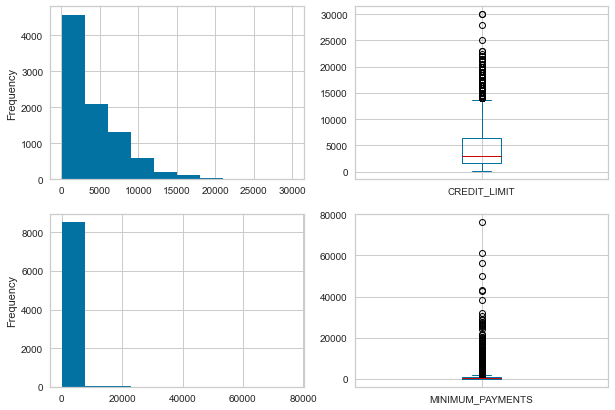

In [11]:
# Histogram dan boxplot kolom CREDIT_LIMIT & MINIMUM_PAYMENTS

fig = plt.figure(figsize=(10,7))

ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

df['CREDIT_LIMIT'].plot(kind='hist', ax=ax0)
df['CREDIT_LIMIT'].plot(kind='box', ax=ax1)
df['MINIMUM_PAYMENTS'].plot(kind='hist', ax=ax2)
df['MINIMUM_PAYMENTS'].plot(kind='box', ax=ax3)

Karena kolom `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS` memiliki banyak *outlier* atau pecilan, maka *missing values* akan diisi dengan nilai median.

In [12]:
# Mengisi missing values dengan median
df["CREDIT_LIMIT"].fillna(value=df["CREDIT_LIMIT"].median(), inplace=True)
df["MINIMUM_PAYMENTS"].fillna(value=df["MINIMUM_PAYMENTS"].median(), inplace=True)

In [13]:
# Memeriksa kembali apakah masih terdapat missing values pada masing-masing kolom
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# Ekplorasi Data

Eksplorasi data dilakukan untuk memahami data lebih dalam dan memeriksa statistik deskriptif serta distribusi data untuk kepentingan pengelompokkan klaster dataset.

## Statistik deskriptif masing-masing kolom

In [14]:
# Melihat rangkuman statistik
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Berdasarkan rangkuman nilai statistik di atas, dapat diketahui bahwa terdapat *outlier* pada masing-masing kolom.Penghapusan nilai *outlier* akan berpengaruh pada hasil pengelompokkan nantinya.Oleh karena itu,kita akan melakukan transformasi data pada tahap *Preprocessing*.

## Distribusi statistik masing-masing kolom

In [15]:
# Membuat fungsi untuk memunculkan histogram dan boxplot masing-masing kolom
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name}')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution')
    
    plt.subplot(1, 3, 3)
    feature.plot(kind = 'box')
    plt.title(f'{feature.name}')
    plt.show()

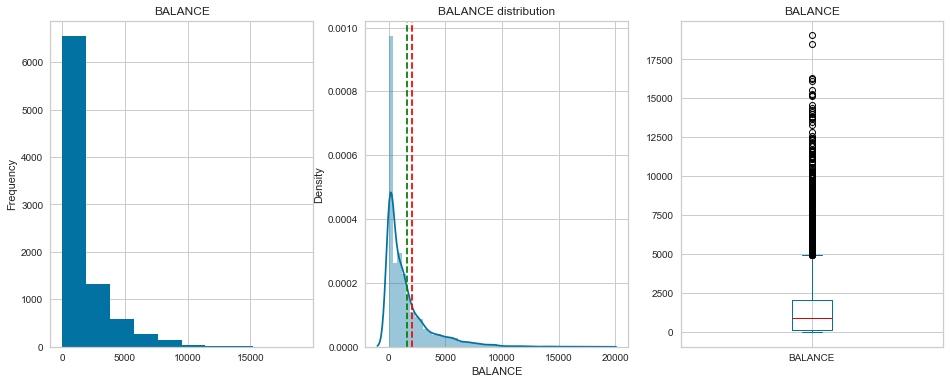

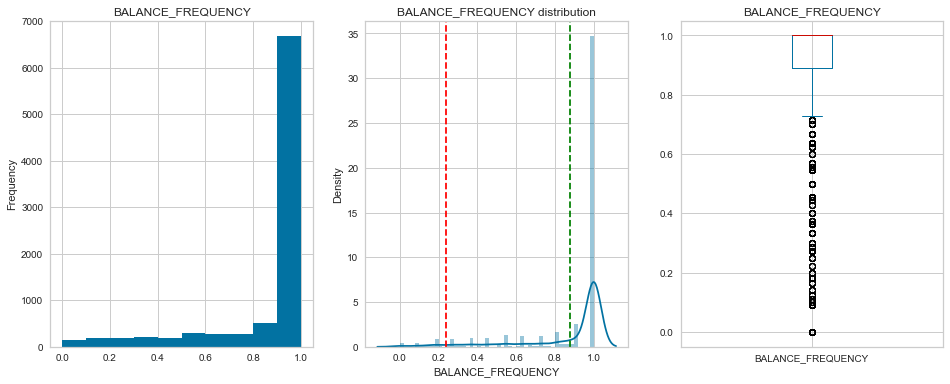

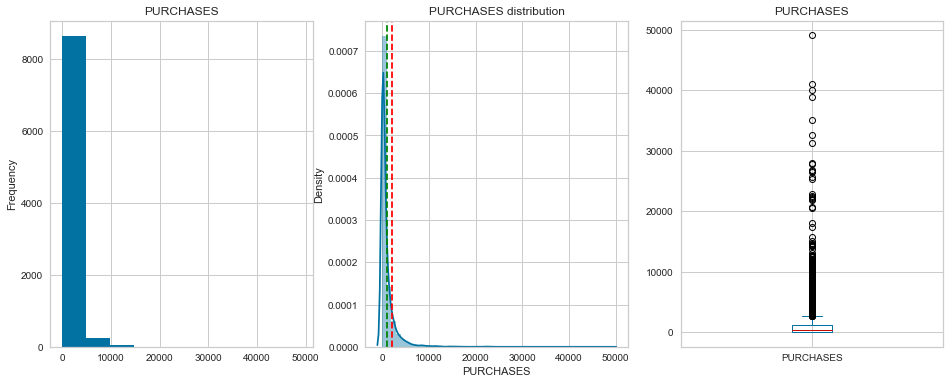

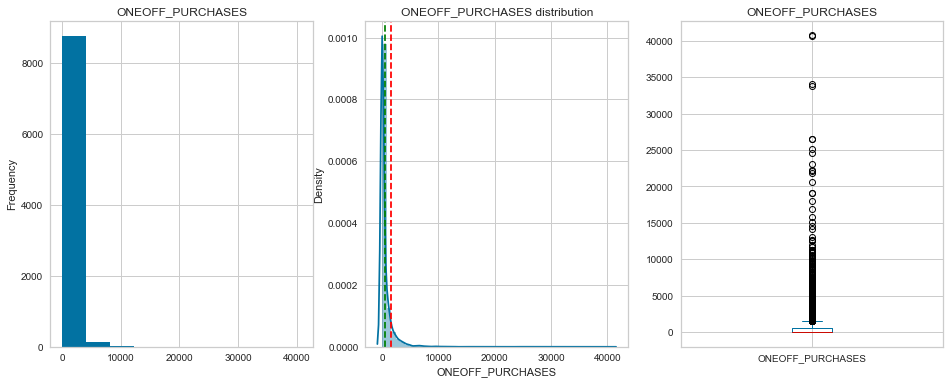

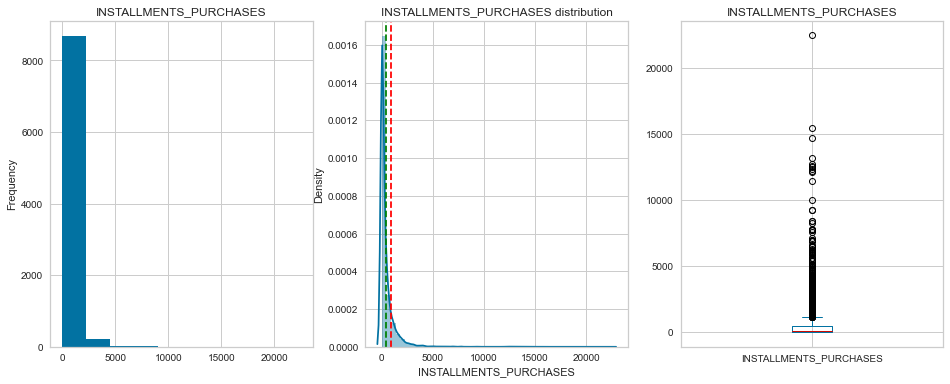

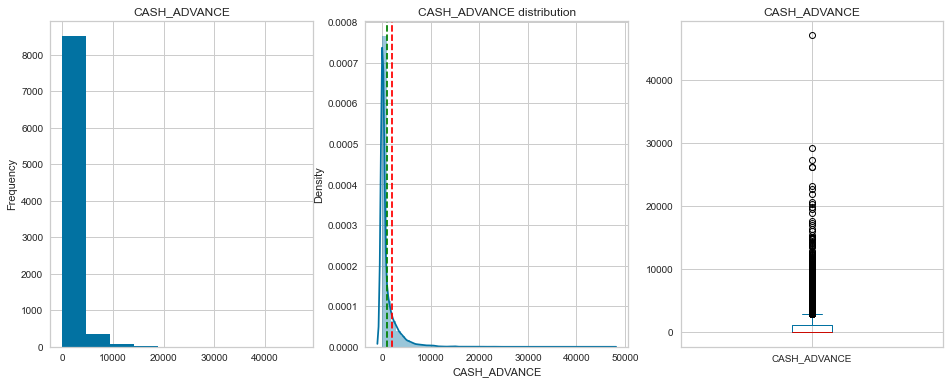

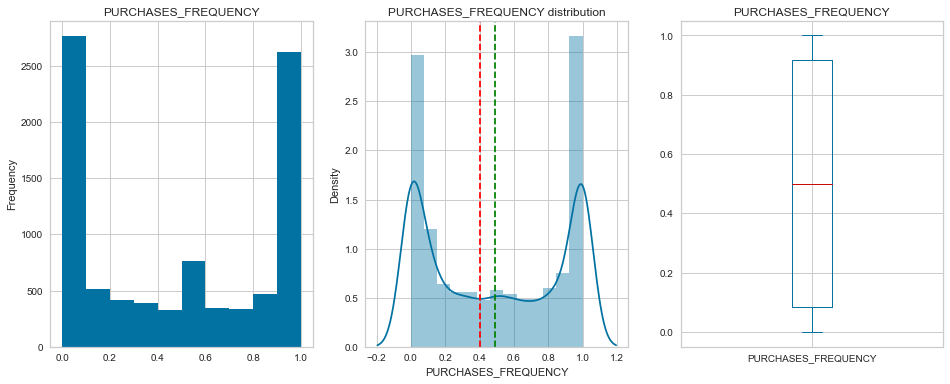

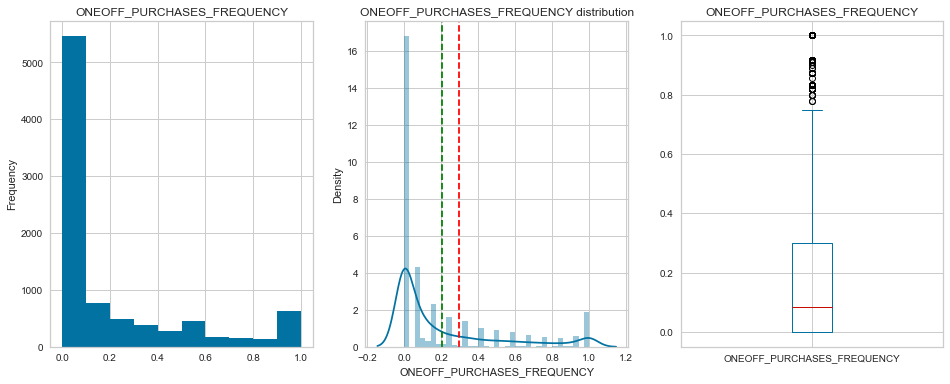

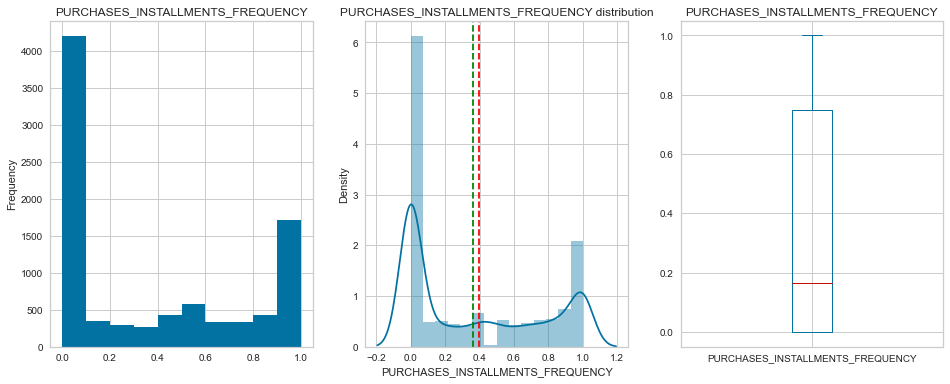

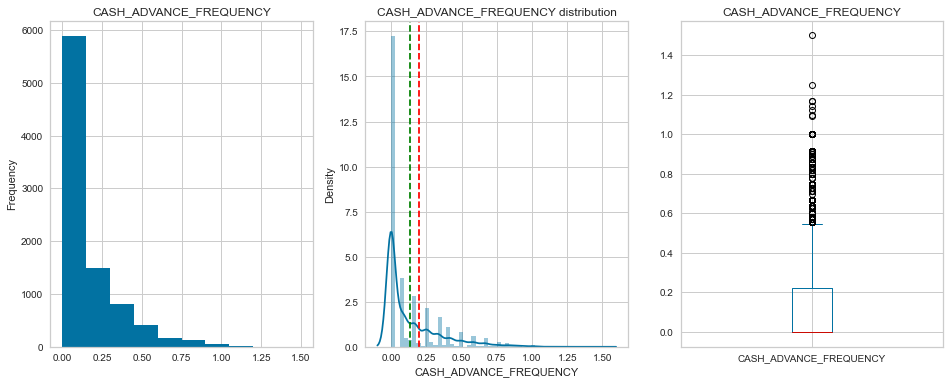

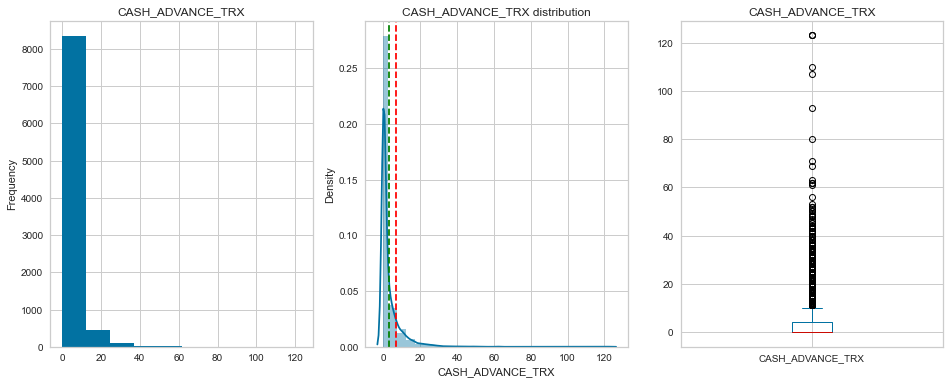

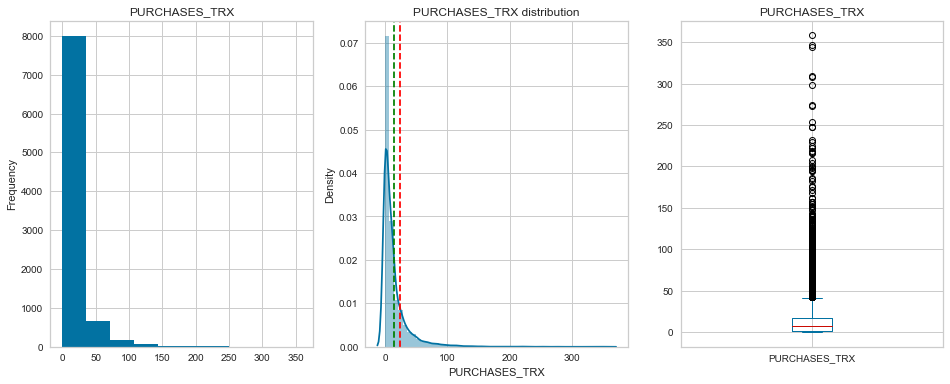

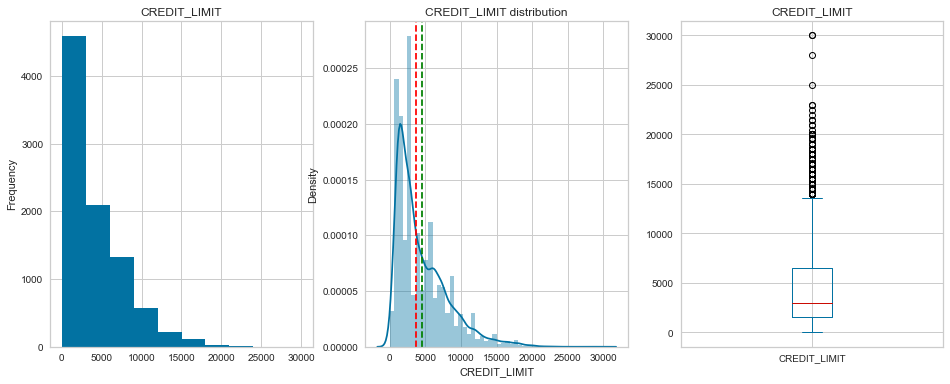

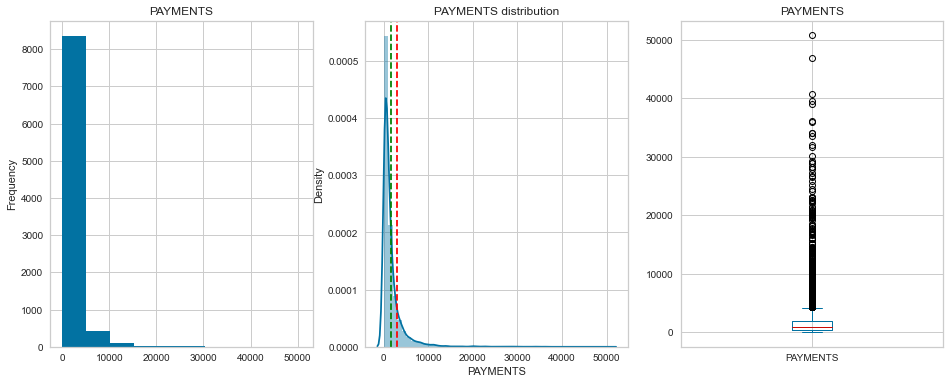

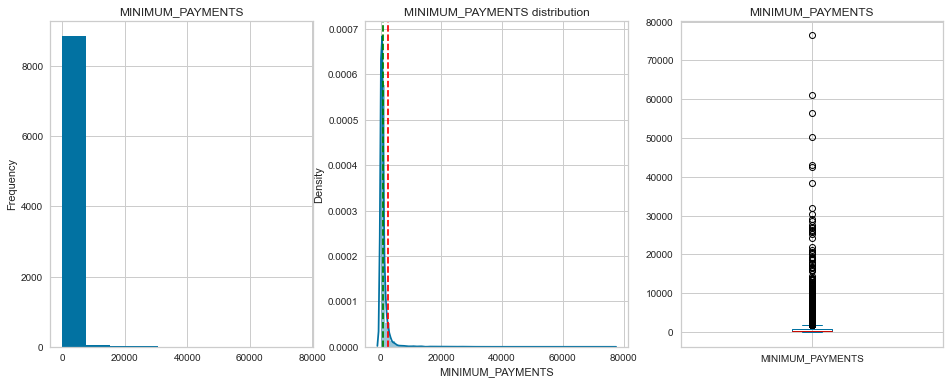

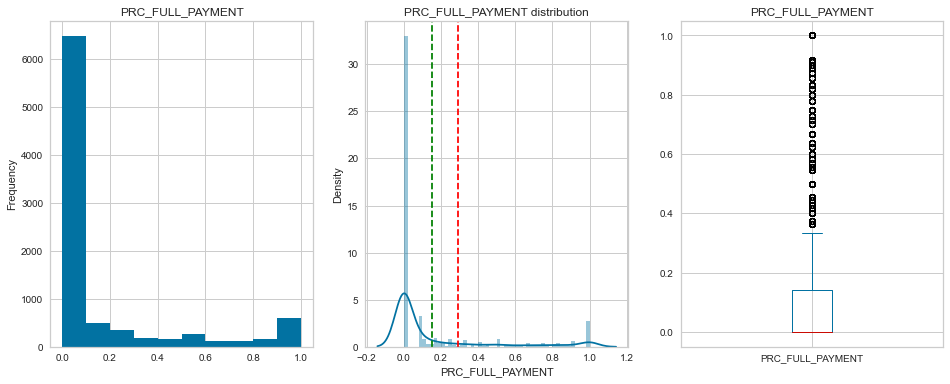

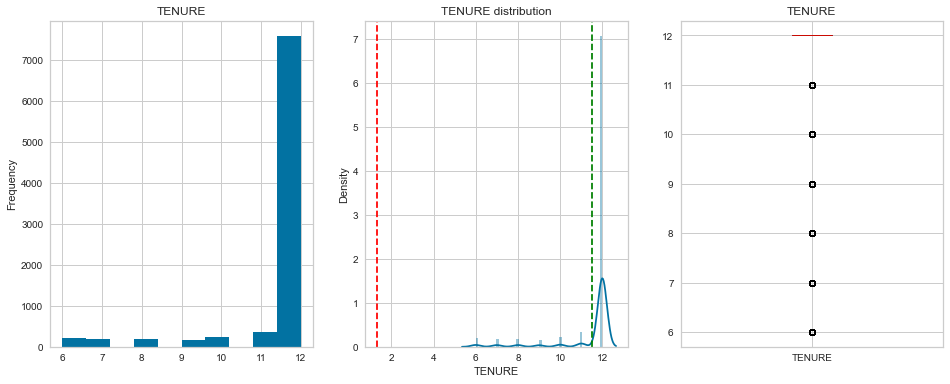

In [16]:
# Memunculkan plot masing-masing kolom numerik. Kolom kategorik tidak diikutsertakan
num_feature = df.select_dtypes(exclude='object')

for i in num_feature.columns:
    feat_plot(num_feature[i])

Berdasarkan plot distribus dan nilai stat deskriptif pada output, maka dapat kita ketahui bahwa selama 6 bulan penggunaan kartu kredit:
1. Mayoritas pengguna kartu kredit memiliki saldo di bawah 2500 dengan saldo rata-rata mereka sekitar 1500 dan Saldo pengguna kartu kredit juga sering diperbaharui,dapat dilihat dari angka 1 sebagai frekuensi tertinggi dimana berarti pengguna kartu kredit sering memperbarui saldo dalam kartu kredit.
2. Pengguna kartu kredit kebanyakan melakukan transaksi pembelian menggunakan kartu kredit dengan nominal di bawah 5000 dengan rata-rata nominal transaksi di sekitar 1000. Selain itu, kebanyakan pengguna melakukan transaksi dengan nominal terbanyak dalam satu kali transaksi adalah di bawah 1000 dan pengguna kebanyakan melakukan pembelian angsuran menggunakan kartu kredit dengan nominal di bawah 5000. Ini diduga karena jumlah saldo yang kecil, maka diikuti dengan transaksi pembelian yang kecil pula.
3. Pengguna kartu kredit tidak cukup sering melakukan transaksi pembelian menggunakan kartu kredit, baik itu dalam satu kali transaksi maupun angsuran (ditunjukkan oleh plot `PURCHASE_FREQUENCY`, `ONEOFF_PURCHASE_FREQUENCY`, dan `PURCHASES_INSTALLMENTS FREQUENCY`).
4. Mayoritas pengguna memiliki limit kredit di bawah angka 5000 dengan nilai rata-rata sebesar 4494 dan nilai tengah sebesar 3638
5. Mayoritas pembayaran yang dilakukan pembeli berada di bawah nominal 500
6. Pembeli harus melakukan pembayaran minimal 300 untuk setiap pembayaran dengan menggunakan kartu kredit,dapat dilihat dari median kolom <b>*MINIMUM_PAYMENTS*</b>
7. Mayoritas pengguna kartu kredit telah melakukan pembayaran 20% dari nilai pembayaran sepenuhnya.
8. Mayoritas masa waktu kepemilikan kartu kredit pengguna adalah antara 10-12 bulan.

## Korelasi antar kolom

In [17]:
# Memeriksa koefisien korelasi antar kolom
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531296,0.322802,0.397920,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095931,0.065008,0.131181,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356977,0.603264,0.095789,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319735,0.567292,0.050256,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256515,0.384084,0.134019,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303997,0.453238,0.140747,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119833,0.103464,0.006154,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295059,0.243537,-0.027311,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060794,0.085551,0.032055,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132608,0.183192,0.100616,-0.249773,-0.133372


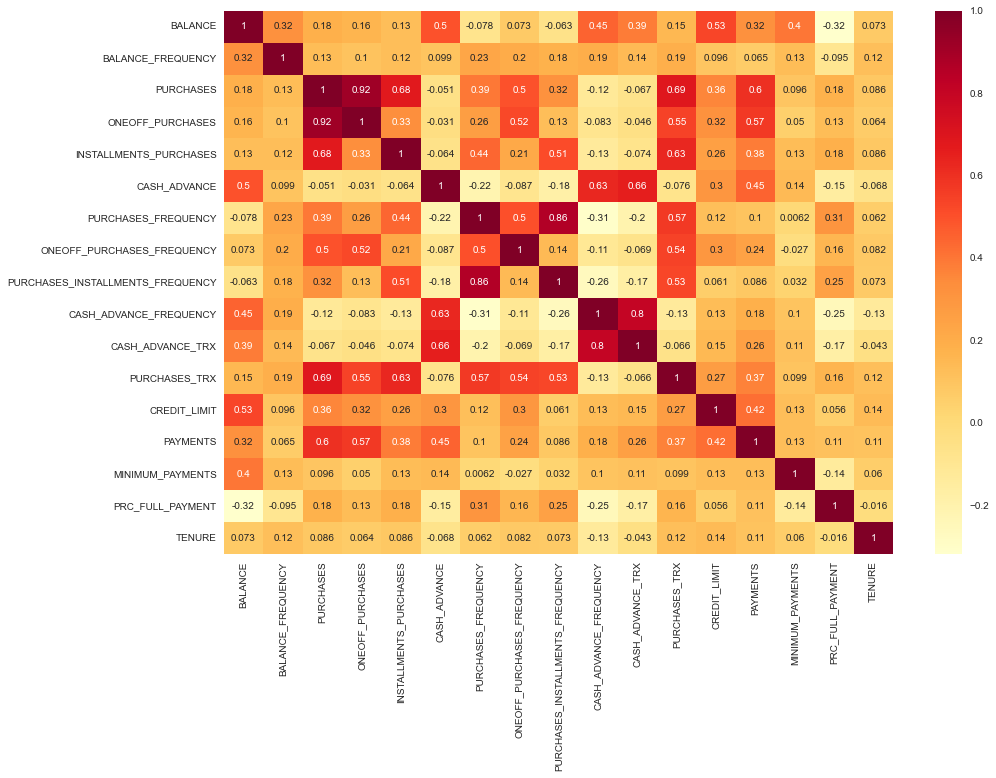

In [18]:
# Memeriksa korelasi menggunakan heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap="YlOrRd")

Berdasarkan *heatmap* plot di atas, dapat diketahui bahwa:
1. Saldo (`BALANCE`) berkorelasi positif dengan uang panjar (`CASH_ADVANCE`) atau uang muka yang diberikan oleh pengguna dan juga limit kredit (`CREDIT_LIMIT`),sehingga semakin besar saldo maka nilai limit kredit dan uang panjar juga semakin besar begitupun sebaliknya.
2. Transaksi pembelian (`PURCHASES`) berkorelasi positif dengan pembelian dalam satu kali transaksi (`ONEOFF_PURCHASES`) dan pembelian angsuran (`INSTALLMENTS_PURCHASES`).Hal ini berarti pengguna banyak melakukan transaksi dalam satu kali dan juga dalam bentuk cicilan/angsuran.
3. Limit kredit (`CREDIT_LIMIT`) berkorelasi positif dengan saldo (`BALANCE`) , pembelian (`PURCHASES`), dan pembayaran (`PAYMENTS`).Hal ini berarti  semakin tinggi jumlah limit kredit akan diikuti dengan semakin banyak nominal saldo (`BALANCE`), pembelian (`PURCHASES`), dan pembayaran(`PAYMENTS`) yang dilakukan pengguna begitupun sebaliknya

# Data Preprocessing

Proses ini dilakukan untuk penyiapan data untuk proses pengelompokkan data.

In [19]:
# Copy dataset
data = df.copy()

## Standarisasi data

Sebelumnya telah diketahui bahwa data memiliki banyak *outlier* dan bukan solusi yang baik untuk menghilangkan *outlier* tersebut, sehingga data akan dilakukan standarisasi menggunakan StandardScaler.

<b> Rumus mencari standarisasi data: (value dalam kolom tertentu - mean dalam kolom tertentu) / standar deviasi dalam kolom tertentu

In [20]:
# Standardizing the data
scaler = StandardScaler()
scaler.fit(data)
scaled_features = scaler.transform(data)
data_scaled = pd.DataFrame(scaled_features,columns = df.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


## Menentukan jumlah klaster optimal menggunakan metode Elbow

Metode kurva Elbow digunakan untuk menentukan jumlah klaster optimal. Jika nilai klaster pertama dengan nilai cluster kedua memberikan sudut dalam grafik atau nilainya mengalami penurunan paling besar, maka klaster dua merupakan jumlah klaster yang optimal.

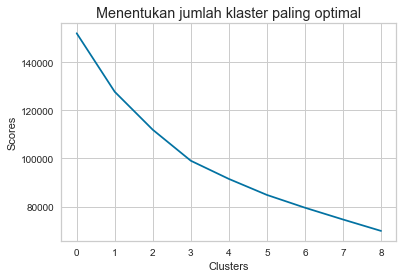

In [21]:
# Membuat plot kurva Elbow
scores_1 = []

range_values = range(1,10)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Menentukan jumlah klaster paling optimal')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

Berdasarkan plot di atas, dapat dilihat secara grafik bahwa klaster berjumlah 3 adalah yang paling optimal kerena titik tersebut adalh titik dengan penurunan paling signifikan dari cluster sebelumnya dan juga titik tersebut merupakan sudut yang paling mendekati siku-siku

# Pendefinisian Model

In [22]:
X = data_scaled.copy()

In [23]:
# Mendefinisikan model kmeans dengan jumlah klaster sebanyak 3
kmeans = KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=300, random_state = 42)

# Pelatihan Model

In [24]:
# Fitting data scaled dengan model K-means 
kmeans.fit(X)
labels= kmeans.labels_

In [25]:
# Mengecek jumlah klaster berdasarkan kolom
kmeans.cluster_centers_.shape

(3, 17)

<b> Terdapat 3 klaster berdasarkan 17 kolom

# Evaluasi Model

## Interpretasi karakteristik masing-masing klaster

In [26]:
# Rata-rata nilai masing-masing kolom berdasarkan klasternya
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.367479,-0.177887,-0.232767,-0.204343,-0.174860,-0.309079,-0.062550,-0.234845,-0.048108,-0.334283,-0.298843,-0.243458,-0.335601,-0.284432,-0.137957,0.007407,-0.028018
1,1.162459,0.342379,-0.290351,-0.207374,-0.305615,1.377064,-0.644183,-0.306886,-0.555404,1.560217,1.340884,-0.367484,0.598386,0.443955,0.403730,-0.410004,-0.127018
2,0.320273,0.439829,1.529887,1.281639,1.262380,-0.246793,1.142900,1.561562,0.956512,-0.358511,-0.250804,1.682610,0.891236,0.837033,0.162467,0.493205,0.303153


In [27]:
# Membuat kolom keterangan klaster pada dataframe
df_clusters = pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
df_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


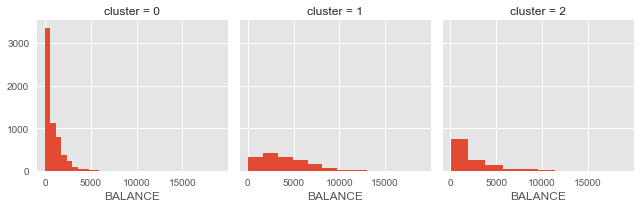

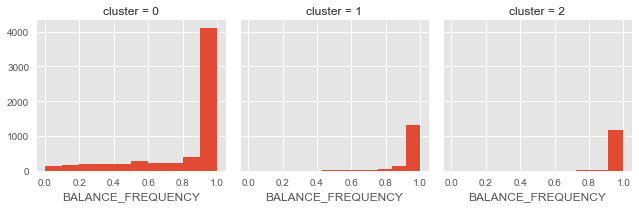

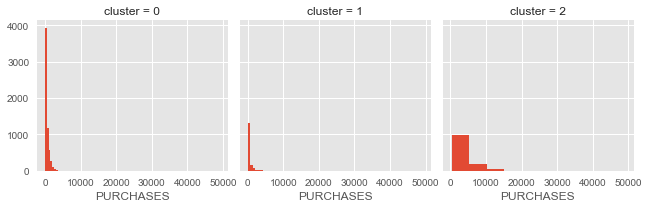

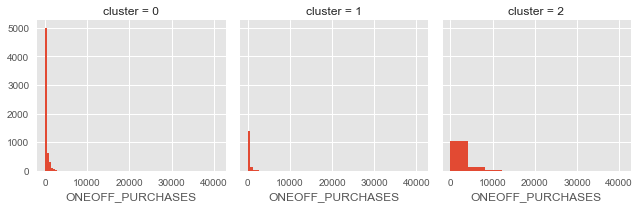

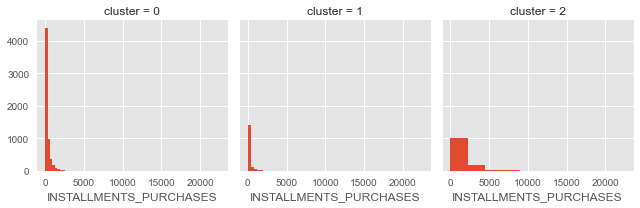

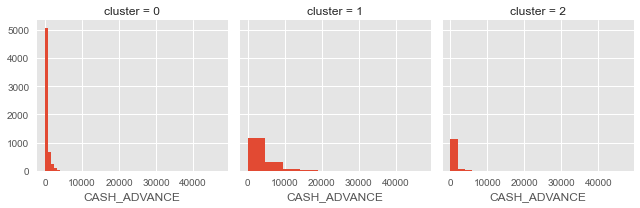

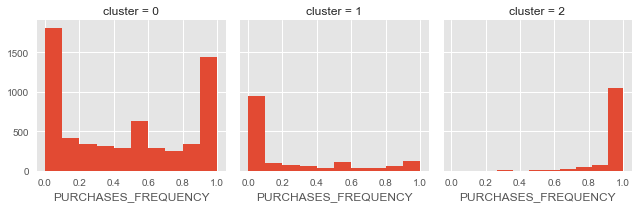

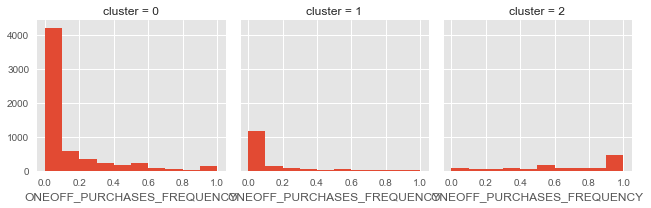

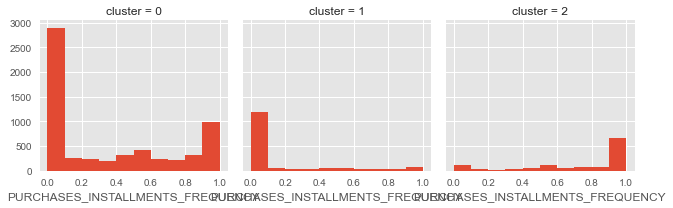

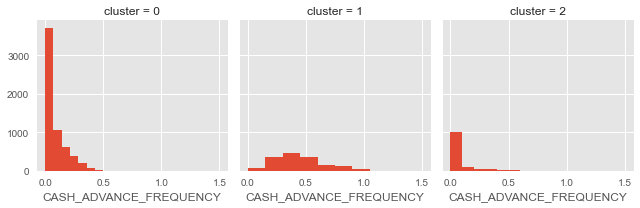

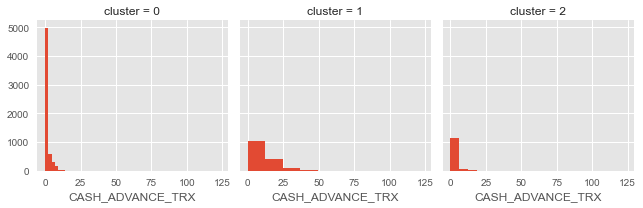

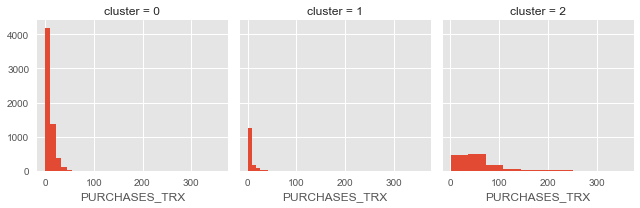

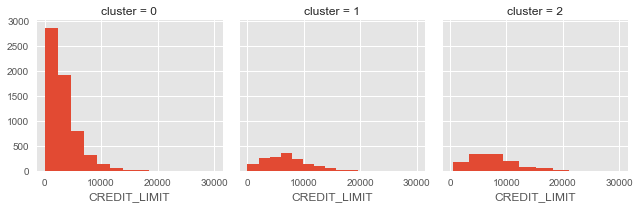

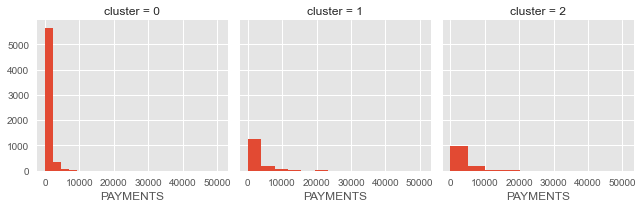

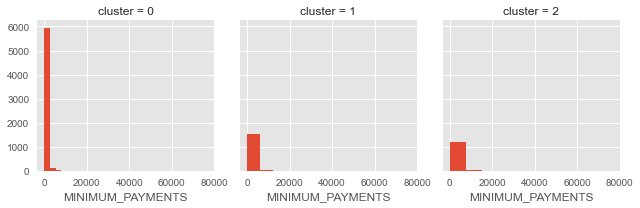

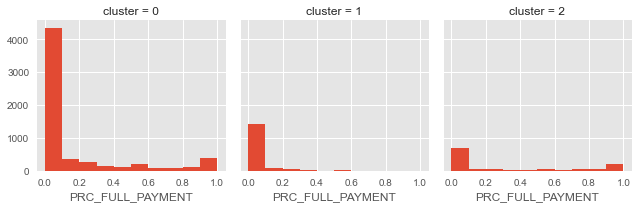

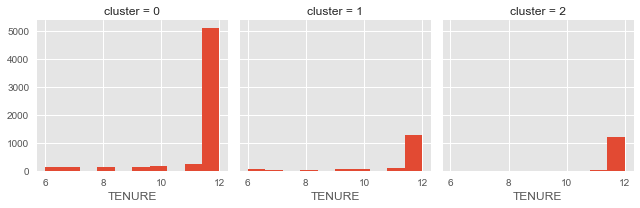

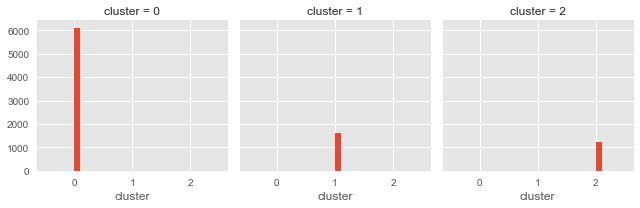

In [28]:
# Interpretasi klaster yang terbentuk
for c in df_clusters:
    grid= sns.FacetGrid(df_clusters, col='cluster')
    grid.map(plt.hist, c)

Berdasarkan pengelompokkan klaster di atas,dapat diketahui bahwa masing-masing klaster mempunyai masing-masing karakteristik yang berbeda.Seperti:

**- Klaster 0 (Pengguna dengan limit kredit rendah, sisa saldo rendah)**

Cluster ini berisikan anggota dengan jumlah saldo yang tersisa paling sedikit dan mayritas anggotanya memiliki saldo tersisa sebesar 0, namun banyak juga dari anggota klaster 0 yang sering memperbarui saldo mereka. Mayoritas klaster 0 juga memiliki batas kredit yang kecil jika dibanding dengan cluster yang lain yaitu dibawah 5000. Frekuensi transaksi pembelian dan pembayaran yang dilakukan tinggi. Klaster 1 merupakan klaster dengan anggota terbanyak dari keseluruhan anggota pada data. 

**- Klaster 1 (Pengguna dengan limit sedang, sisa saldo sedang)**

Cluster ini berisikan anggota dengan jumlah saldo yang tersisa paling banyak dengan sisa saldo terbesar diantara 15000 s/d 20000, namun melakukan transaksi pembelian dan pembayaran dengan nominal yang tinggi dibanding klaster yang lain. Anggota pada klaster ini juga cukup sering memperbarui saldo kredit mereka. mayoritas anggota klaster ini memiliki batasan kredit diantara 5000 s/d 15000. frekuensi transaksi yang dilakukan cukup besar dan frekuensi uang tunai yang dibayarkan di muka besar.Jumlah Anggota pada klaster ini berada dibawah klaster 0 dan diatas klaster 2. 

**- Klaster 2 (Pengguna dengan limit kredit tinggi, sisa saldo tinggi)**

Cluster ini berisikan anggota dengan jumlah saldo yang tersisa sedang (diibawah klaster 1 diatas klaster 0), dengan mayoritas anggota klaster ini adalah yang paling sering melakukan pembaruan saldo kredit mereka. Limit kredit pada klaster ini jauh lebih tinggi dibanding klaster lainnya. Anggota pada klaster ini memiliki presentasi pembayaran penuh yang dibayarkan oleh pengguna yang cukup tinggi. Frekuensi pembayaran dengan tunai rendah dan anggota klaster ini melakukan transaksi pembelian yang jauh lebih tinggi dibanding klaster yang lain. Jumlah anggota pada klaster ini jauh lebih rendah dibanding 2 klaster sebelumnyazz

In [29]:
# Jumlah observasi dalam masing-masing klaster

count_cluster = df_clusters.groupby('cluster').count()
count_cluster['BALANCE']

cluster
0    6119
1    1596
2    1235
Name: BALANCE, dtype: int64

Diketahui bahwa terdapat 6119 pengguna pada klaster 0, 1596 pengguna pada klaster 1 dan 1235 pengguna pada klaster 2

### Menentukan silhouette_score

In [30]:
label = kmeans.labels_
score = silhouette_score(X, label, metric = 'euclidean')

# Print the score
print('Silhouette Score:' ,score)

Silhouette Score: 0.25061926305697263


### Membuat grafik silhouette_score untuk menentukan jumlah klaster yang optimal

In [31]:
silhouette_scores = []
number_of_clusters = range(2,18)

for i in number_of_clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)

  labels = kmeans.labels_
  silhouette_scores.append(silhouette_score(X, labels, metric = 'euclidean'))

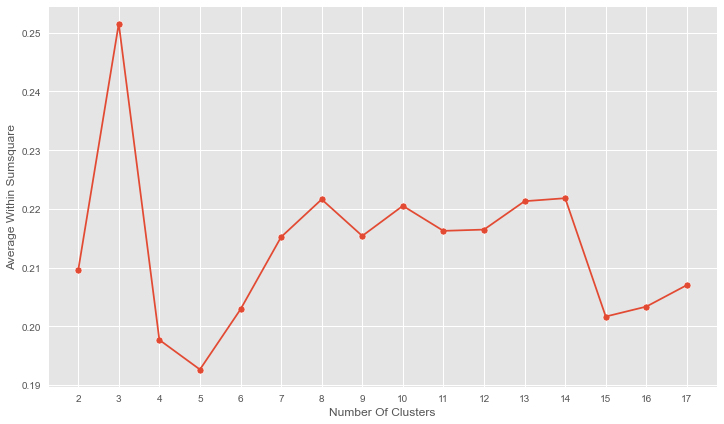

In [32]:
plt.figure(figsize=(12,7))

sns.lineplot(number_of_clusters, silhouette_scores)
sns.scatterplot(number_of_clusters, silhouette_scores)

plt.xticks(number_of_clusters)

plt.xlabel('Number Of Clusters')
plt.ylabel('Average Within Sumsquare')
plt.show()

Brdasarkan plot diatas menunjukkan bahwa dari hasil silhouette analisis menunjukkan bahwa clustering yang paling tepat adalah pembagian dengan 3 cluster.

# Model Inference

Untuk menguji keakuratan model, dilakukan model inference untuk menguji model dengan data di luar data yang tersedia.

In [33]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<b> Contoh Kasus: </b>

1. Terdapat pengguna kartu kredit dengan catatan transaksi sebagai berikut:

- BALANCE : 3002

- BALANCE_FREQUENCY : 0.84

- PURCHASES : 802

- ONEOFF_PURCHASES : 802

- INSTALLMENTS_PURCHASES = 252

- CASH_ADVANCE = 502

- PURCHASES_FREQUENCY = 1.0

- ONEOFF_PURCHASES = 1.0

- INSTALLMENTS_PURCHASES_FREQUENCY = 0.9

- CASH_ADVANCE_FREQUENCY = 0.8

- CASH_ADVANCE_TRX = 26

- PURCHASES_TRX = 38

- CREDIT_LIMIT = 6402

- PAYMENTS = 3102

- MINIMUM_PAYMENTS = 502

- PRC_FULL_PAYMENT = 0.40

- TENURE = 14 

Pengguna ini akan termasuk dalam kelompok klaster berapa?

In [34]:
balance = float(input('Balance:'))
balance_frq = float(input('Balance Frequency:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
tenure = float(input('Tenure:'))

val = [balance, balance_frq, purchases, oneoff_purchases, installment_purchases, 
       cash_advance, purchases_frq, oneoff_purchases_frq, installment_purchases_frq,
       cash_advance_frq, cash_advance_trx,
      purchases_trx, credit_limit, payments, minimum_payments, prc_full_payments, tenure]
val = scaler.transform([val])

print('Input values:', val)

val_predict = kmeans.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam cluster {} ,karakteristiknya memiliki limit kredit rendah, sisa saldo rendah'.format(val_predict))    
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, karakteristiknya memiliki limit sedang, sisa saldo sedang'.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, karakteristiknya memiliki limit kredit tinggi, sisa saldo tinggi'.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')    

Balance:3002
Balance Frequency:0.84
Purchases Amount:802
ONEOFF Purchases Amount:802
Installment Purchases Amount:252
Cash Advance Amount:502
Purchases Frequency:1.0
ONEOFF Purchases Frequency:1.0
Installment Purchases Frequency:0.9
Cash Advance Frequency:0.8
Number of Cash Advance Transaction:26
Number of Purchases Transaction:38
Credit Limit Amount:6402
Payment Amount:3102
Minimum Payments Amount:502
Percentage of Full Payments:0.40
Tenure:14
Input values: [[ 0.69064784 -0.15733296 -0.0941743   0.12625813 -0.17590382 -0.22740128
   1.26984323  2.67345108  1.34757975  3.3224482   3.33386403  0.93699403
   0.52432244  0.4728506  -0.14700234  0.84205056  1.85516192]]
Pengguna tidak termasuk dalam klaster manapun


<b> Contoh Kasus: </b>

2. Terdapat pengguna kartu kredit dengan catatan transaksi sebagai berikut:

- BALANCE : 1322

- BALANCE_FREQUENCY : 0.62

- PURCHASES : 452

- ONEOFF_PURCHASES : 452

- INSTALLMENTS_PURCHASES = 52

- CASH_ADVANCE = 102

- PURCHASES_FREQUENCY = 0.7

- ONEOFF_PURCHASES = 0.7

- INSTALLMENTS_PURCHASES_FREQUENCY = 0.5

- CASH_ADVANCE_FREQUENCY = 0.7

- CASH_ADVANCE_TRX = 7

- PURCHASES_TRX = 12

- CREDIT_LIMIT = 3502

- PAYMENTS = 1002

- MINIMUM_PAYMENTS = 102

- PRC_FULL_PAYMENT = 0.04

- TENURE = 14

Pengguna ini akan termasuk dalam kelompok klaster berapa?

In [35]:
balance = float(input('Balance:'))
balance_frq = float(input('Balance Frequency:'))
purchases = float(input('Purchases Amount:'))
oneoff_purchases = float(input('ONEOFF Purchases Amount:'))
installment_purchases = float(input('Installment Purchases Amount:'))
cash_advance = float(input('Cash Advance Amount:'))
purchases_frq = float(input('Purchases Frequency:'))
oneoff_purchases_frq = float(input('ONEOFF Purchases Frequency:'))
installment_purchases_frq = float(input('Installment Purchases Frequency:'))
cash_advance_frq = float(input('Cash Advance Frequency:'))
cash_advance_trx = float(input('Number of Cash Advance Transaction:'))
purchases_trx = float(input('Number of Purchases Transaction:'))
credit_limit = float(input('Credit Limit Amount:'))
payments = float(input('Payment Amount:'))
minimum_payments = float(input('Minimum Payments Amount:'))
prc_full_payments = float(input('Percentage of Full Payments:'))
tenure = float(input('Tenure:'))

val = [balance, balance_frq, purchases, oneoff_purchases, installment_purchases, 
       cash_advance, purchases_frq, oneoff_purchases_frq, installment_purchases_frq,
       cash_advance_frq, cash_advance_trx,
      purchases_trx, credit_limit, payments, minimum_payments, prc_full_payments, tenure]
val = scaler.transform([val])

print('Input values:', val)

val_predict = kmeans.predict(val)

if val_predict == 0:
    print('Pengguna termasuk ke dalam cluster {} ,karakteristiknya memiliki limit kredit rendah, sisa saldo rendah'.format(val_predict))    
elif val_predict == 1:
    print('Pengguna termasuk ke dalam klaster {}, karakteristiknya memiliki limit sedang, sisa saldo sedang'.format(val_predict))
elif val_predict == 2:
    print('Pengguna termasuk ke dalam klaster {}, karakteristiknya memiliki limit kredit tinggi, sisa saldo tinggi'.format(val_predict))
else:
    print('Pengguna tidak termasuk dalam klaster manapun')    

Balance:1322
Balance Frequency:0.62
Purchases Amount:452
ONEOFF Purchases Amount:452
Installment Purchases Amount:52
Cash Advance Amount:102
Purchases Frequency:0.7
ONEOFF Purchases Frequency:0.7
Installment Purchases Frequency:0.5
Cash Advance Frequency:0.7
Number of Cash Advance Transaction:7
Number of Purchases Transaction:12
Credit Limit Amount:3502
Payment Amount:1002
Minimum Payments Amount:102
Percentage of Full Payments:0.04
Tenure:14
Input values: [[-0.11649515 -1.08603104 -0.25799244 -0.08461127 -0.3970724  -0.41814572
   0.52236284  1.66781751  0.341102    2.82272357  0.5496816  -0.10902012
  -0.2727217  -0.25256256 -0.31848025 -0.38879082  1.85516192]]
Pengguna tidak termasuk dalam klaster manapun


# Conclusion

Berdasarkan keseluruhan hasil analisis di atas, dapat disimpulkan bahwa:

1. Project ini membahas tentang penerapan algoritma Unsupervised Learning, yaitu Clustering. Metode Clustering yang akan digunakan adalah Principal Component Analysis (PCA) dan K-Means Clustering. Data yang digunakan dalam analisis klaster ini adalah data yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut dan 8950 baris. Objektif dari project ini adalah mengelompokkan pengguna kartu kredit berdasarkan kebiasaan transaksi (transaction behaviour) yang dijalankannya ke dalam beberapa klaster.
2. Menggunakan K-means Clustering , pengelompokkan dibagi menjadi 3 klaster dengan karakteristik sebagai berikut:
- Klaster 0 : Pengguna dengan limit kredit rendah, sisa saldo rendah.

Cluster ini berisikan anggota dengan jumlah saldo yang tersisa paling sedikit dan mayritas anggotanya memiliki saldo tersisa sebesar 0, namun banyak juga dari anggota klaster 0 yang sering memperbarui saldo mereka. Mayoritas klaster 0 juga memiliki batas kredit yang kecil jika dibanding dengan cluster yang lain yaitu dibawah 5000. Frekuensi transaksi pembelian dan pembayaran yang dilakukan tinggi. Klaster 1 merupakan klaster dengan anggota terbanyak dari keseluruhan anggota pada data. 
- Klaster 1 : Pengguna dengan limit sedang, sisa saldo sedang.

Cluster ini berisikan anggota dengan jumlah saldo yang tersisa paling banyak dengan sisa saldo terbesar diantara 15000 s/d 20000, namun melakukan transaksi pembelian dan pembayaran dengan nominal yang tinggi dibanding klaster yang lain. Anggota pada klaster ini juga cukup sering memperbarui saldo kredit mereka. mayoritas anggota klaster ini memiliki batasan kredit diantara 5000 s/d 15000. frekuensi transaksi yang dilakukan cukup besar dan frekuensi uang tunai yang dibayarkan di muka besar.Jumlah Anggota pada klaster ini berada dibawah klaster 0 dan diatas klaster 2. 
- Klaster 2 : Pengguna dengan limit kredit tinggi, sisa saldo tinggi

Cluster ini berisikan anggota dengan jumlah saldo yang tersisa sedang (diibawah klaster 1 diatas klaster 0), dengan mayoritas anggota klaster ini adalah yang paling sering melakukan pembaruan saldo kredit mereka. Limit kredit pada klaster ini jauh lebih tinggi dibanding klaster lainnya. Anggota pada klaster ini memiliki presentasi pembayaran penuh yang dibayarkan oleh pengguna yang cukup tinggi. Frekuensi pembayaran dengan tunai rendah dan anggota klaster ini melakukan transaksi pembelian yang jauh lebih tinggi dibanding klaster yang lain. Jumlah anggota pada klaster ini jauh lebih rendah dibanding 2 klaster sebelumnya

# Save Model

Pada tahap menyimpan serta membaca data ke dalam/dari sebuah file dapat digunakannya sebuah modul pickle.

In [36]:
pickle_file_dir = open("kmeans_model.pkl", "wb")

pickle.dump(kmeans, pickle_file_dir)
pickle_file_dir.close()

In [37]:
pickle_file_dir_scale = open("scaler.pkl", "wb")
pickle.dump(scaler, pickle_file_dir_scale)
pickle_file_dir_scale.close()